# Analysis of the Impact of BoC actions on Canadian Banking sector through COVID-19

Presenters: 
- Amar Munipalle
- Alexandra Hu
- Nitesh Jain
- Shuran Xu





## Background of Covid 19 and the Economy
The COVID-19 pandemic represents a serious health threat to people around the world and a significant disruption to daily life. It is having a major impact on the global and Canadian economies. Every sector of the Canadian economy is affected. Some sectors, such as the energy, travel and hospitality, and service industries, are being particularly hard hit.

The public health actions needed to contain the spread of the virus, such as school closures, states of emergency, and social distancing measures, while necessary, are themselves going to significantly impact economic activity.

However, it’s important to underscore that while the impact is large, it will be temporary. Authorities around the world have taken bold and necessary measures to contain the spread of the virus and to support people and businesses through a very challenging time.

## 1. Volatility Analysis on VIX Portfolio

In [36]:
# Build VIX portfolio
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 6, 30)
vix=['^VIX']
VIX = build_portfolio(names=vix, start_date=start_date, end_date=end_date, data_api="yfinance")
VIX_DF=VIX.data
consol_banks['VIX']=VIX_DF['^VIX']

[*********************100%***********************]  1 of 1 completed


### 1.1 VIX as indicator of bank stock price fluctuation

In [38]:
# Plot VIX during the COV-19 period
trace1 = go.Line(
    x=consol_banks.index,
    y=consol_banks['Big Banks'],
    name='Big Bank Stocks',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Line(
    x=consol_banks.index,
    y=consol_banks['Small Banks'],
    name='Small Bank Stocks',
    marker=dict(
        color='rgb(60,100,102)'
               )
)
trace3 = go.Bar(
    x=consol_banks.index,
    y=consol_banks['VIX'],
    name='VIX'
)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = "VIX",xaxis=dict(
      tickangle=-90
    ))
fig.show()

### 1.2 Volatility Spike Comparable to 08 Crisis

In [39]:
#Plot VIX since 2008 to compare volatility spikes
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 6, 30)
vix=['^VIX']
vix = build_portfolio(names=vix, start_date=start_date, end_date=end_date, data_api="yfinance")
VIX_Hist=vix.data
plot_vix_hist=VIX_Hist.hvplot.area(x='Date', y=['^VIX'], stacked=False,
                legend='bottom_right', height=400, width=800,title="Volatility Spike Comprable to 08 Crisis")
plot_vix_hist

[*********************100%***********************]  1 of 1 completed


:Area   [Date]   (^VIX)

In [40]:
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2020, 6, 30)
SPX=['^GSPC']
SPX = build_portfolio(names=SPX, start_date=start_date, end_date=end_date, data_api="yfinance")
SPX_Hist=SPX.data

time_series = SPX_Hist['^GSPC']
indices = find_peaks(time_series, threshold=10)[0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines',
    name='S&P 500'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Local Peaks'
))
fig.update_layout(
    title_text='S&P 500 from Jan 2019.Local peaks in 2020 highlight volatility'
)
fig.show()

[*********************100%***********************]  1 of 1 completed


### 1.3  S&P500 Drawdown Comparison

In [41]:
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 6, 30)
SPX=['^GSPC']
SPX = build_portfolio(names=SPX, start_date=start_date, end_date=end_date, data_api="yfinance")
SPX_Hist=SPX.data
xs = SPX_Hist['^GSPC']
# Calculations for first drawdown (CORONA)
array=(np.maximum.accumulate(xs) - xs)
i = np.argmax(array) # end of the period
j = np.argmax(xs[:i]) # start of period

# Calculations for second drawdown (2008 Crisis)
array2=array.copy()
array2[j:i]=0
array2[i:]=0
i2 = np.argmax(array2) # end of the period
j2 = np.argmax(xs[:i2]) # start of period

# Calculations for third drawdown (Dotcom bubble and 9/11)
array3=array2.copy()
array3[j2:i2]=0
array3[i2:]=0
i3 = np.argmax(array3) # end of the period
j3 = np.argmax(xs[:i3]) # start of period


#Emergency code to use matplotlib if HVPLOT does not work
#plt.plot(xs)
#plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)
#plt.plot([i2, j2], [xs[i2], xs[j2]], 'o', color='Blue', markersize=10)

# Using GO 
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=xs,
    x=SPX_Hist.index,
    mode='lines',
    name='S&P 500'
))

fig.add_trace(go.Scatter(
    x=[i, j],
    y=[xs[i], xs[j]],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Corona Drawdown'
))
fig.add_trace(go.Scatter(
    x=[i2, j2],
    y=[xs[i2], xs[j2]],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='x'
    ),
    name='2008 GFC Drawdown'
))
fig.add_trace(go.Scatter(
    x=[i3, j3],
    y=[xs[i3], xs[j3]],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='diamond'
    ),
    name='Dotcom burst and 9/11'
))
fig.update_layout(
    title_text='S&P 500: drawdown comparison'
)
fig.show()

[*********************100%***********************]  1 of 1 completed


/Users/shuran/anaconda3/envs/develop/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



## 2. Actions taken by Bank of Canada

- Government of Canada Bond Purchase Program (GBPP)

- Canada Mortgage Bond Purchase Program (CMBP)

- Bankers’ Acceptance Purchase Facility (BAPF)

- Provincial Bond Purchase Program (PBPP)

- Corporate Bond Purchase Program (CBPP)

- Commercial Paper Purchase Program (CPPP)

- Contingent Term Repo Facility (CTRF)

### 2.1 Preparation

Bank of Canada provides api to their database: PyValet
documentation https://www.bankofcanada.ca/valet/docs

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
from pyvalet import ValetInterpreter
import datetime as dt
import hvplot.pandas
import plotly.express as px
vi = ValetInterpreter()

In [ ]:
! pip install  pyvalet

### 2.2 Visual Representation of Action Data

In [3]:
# Extract the data from Bank of Canada's Valet API
df1 = vi.get_group_observations("B2_WEEKLY", response_format='csv')

# Drop the columns not used in Quantitative Easing and rename the ones used
df2 = df1.rename(columns=
           {list(df1)[0]:'date',
           "V36612" : "Treasury Bills",
           "V36613" : "Government of Canada Bonds",
           "V1160788296" : "Real Return Bonds",
           "V1038114416" : "Canada Mortgage Bonds",
           "v1146067261" : "Provincial Money Market",
           "v1154426989" : "Provincial Bonds",
           "v1146067262" : "Bankers Acceptance",
           "v1146067263" : "Commercial Paper",
           "v1154426990" : "Corporate Bonds",
           "V44201362" : "Securities Purchased under Resale Agreement",
           "V36610" : "Total Assets"
           }).drop(columns=["V36634", 
                            "V36635", "V36636", "V36632", "V36624", "V36625", "V36628", "v1146067264"])

#Set the date as index and convert it to Datetime Object from String Object
assets_df = df2.set_index('date')
assets_df.index = pd.to_datetime(assets_df.index)

# Export the data to excel
#df2.to_excel('balance_sheet_weekly.xlsx')

#PLot the hvplot for visual representation
assets_df_plot = assets_df.hvplot.line(x = "date", width= 1000, height = 500, rot =90).opts(yformatter="%.0f")
assets_df_plot

:NdOverlay   [Variable]
   :Curve   [date]   (value)

## 3. Stock Prices Analysis

### 3.1 Preparation

In [4]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [6]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv(".env")
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


In [7]:
# Get all Asstes
assets = api.list_assets()

# Keep only tradeable assets
tradeable = [asset for asset in assets if asset.tradable ]
#tradeable

In [4]:
# Create a new empty DataFrame
asset_info_df = pd.DataFrame()
asset_info_df["symbol"] = pd.Series([asset.symbol for asset in assets])
#asset_info_df.sort_values("symbol", inplace=True)
# Display the first 10 asset tickers
display(asset_info_df.head(10))

symbol
0      A
1   AACH
2   AAME
3   AAOI
4    AAP
5    AAU
6   ABEV
7  ACGLO
8  ACGLP
9    ADT

### 3.2 Interactive Monte Carlo Simulator

In [8]:
# Set the ticker
ticker = input("Enter the ticker to run the Monte Carlo Simulation")

# Set timeframe to "1D"
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-03-20", tz="America/New_York").isoformat()

# Get 1 year"s worth of historical data for TD
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df.tail()

Enter the ticker to run the Monte Carlo SimulationRBC


RBC                               
                            open   high      low  close  volume
time                                                           
2020-03-16 00:00:00-04:00  59.01  63.96  59.0100  61.10  620330
2020-03-17 00:00:00-04:00  62.14  69.51  60.2200  68.75  714140
2020-03-18 00:00:00-04:00  64.52  66.73  55.8311  57.43  545048
2020-03-19 00:00:00-04:00  56.90  59.80  55.2200  59.12  676528
2020-03-20 00:00:00-04:00  59.70  63.27  57.4800  57.65  776882

In [9]:
# Drop Outer Table Level
df = df.droplevel(axis=1, level=0)


# Use the drop function to drop extra columns
df.drop(columns=["open", "high", "low", "volume"], inplace=True)


# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date

df.tail()

close
2020-03-16  61.10
2020-03-17  68.75
2020-03-18  57.43
2020-03-19  59.12
2020-03-20  57.65

In [10]:
# Use the `pct_change` function to calculate daily returns of BB
daily_returns = df.pct_change()

# Use the `mean` function to calculate the mean of daily returns for BB
avg_daily_return = daily_returns.mean()["close"]

# Use the `std` function to calculate the standard deviation of daily returns for BB
std_dev_daily_return = daily_returns.std()["close"]

In [12]:
# Set number of trading days and get last closing price of TSLA from DataFrame
num_simulations = 1000
num_trading_days = 252 
stock_last_price = df['close'][-1]
# Initialize empty DataFrame to hold simulated prices for each simulation
simulated_price_df = pd.DataFrame()

# Run the simulation of projecting stock prices for the next trading year, `1000` times
for n in range(num_simulations):
    # Initialize the simulated prices list with the last closing price of TSLA
    simulated_ticker_prices = [stock_last_price]

        # Simulate the returns for 252  trading days
    for i in range(num_trading_days):
        # Calculate the simulated price using the last price within the list
        simulated_price = simulated_ticker_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        # Append the simulated price to the list
        simulated_ticker_prices.append(simulated_price)
    
    # Append the simulated prices of each simulation to DataFrame
    simulated_price_df[f"Simulation {n+1}"] = pd.Series(simulated_ticker_prices)

# Print head of DataFrame
simulated_price_df.head()

Simulation 1  Simulation 2  Simulation 3  Simulation 4  Simulation 5  \
0     57.650000     57.650000     57.650000     57.650000     57.650000   
1     56.201810     58.820894     54.620218     59.546526     56.659939   
2     55.746008     60.033287     55.341468     58.056094     57.826181   
3     56.349814     61.275629     56.072971     60.057064     58.118822   
4     57.124458     59.139071     55.537144     59.789963     57.791561   

   Simulation 6  Simulation 7  Simulation 8  Simulation 9  Simulation 10  ...  \
0     57.650000     57.650000     57.650000     57.650000      57.650000  ...   
1     57.741918     56.532094     57.903367     59.701912      57.241802  ...   
2     55.311771     57.336824     56.529137     59.628711      56.950041  ...   
3     52.931084     56.405025     56.381628     59.673682      56.877396  ...   
4     52.210193     55.782425     55.723633     60.162316      58.182338  ...   

   Simulation 991  Simulation 992  Simulation 993  Simulation 994  \
0       57.650000       57.650000       57.650000       57.650000   
1       58.866724       56.505810       56.625166       57.101961   
2       59.737958       55.470491       53.518379       56.576276   
3       60.135027       55.973567       52.690229       55.560578   
4       61.749915       56.514868       51.333196       54.656579   

   Simulation 995  Simulation 996  Simulation 997  Simulation 998  \
0       57.650000       57.650000       57.650000       57.650000   
1       57.436793       60.428414       56.963541       57.078802   
2       55.708980       60.908245       57.094184       55.580096   
3       54.620490       61.481142       54.850085       57.761610   
4       54.311938       64.389140       53.735087       55.252854   

   Simulation 999  Simulation 1000  
0       57.650000        57.650000  
1       58.137941        56.780522  
2       54.639098        53.457753  
3       54.389716        53.784898  
4       52.486593        53.234697  

[5 rows x 1000 columns]

### 3.3 Stock Price Trajectory Simulation

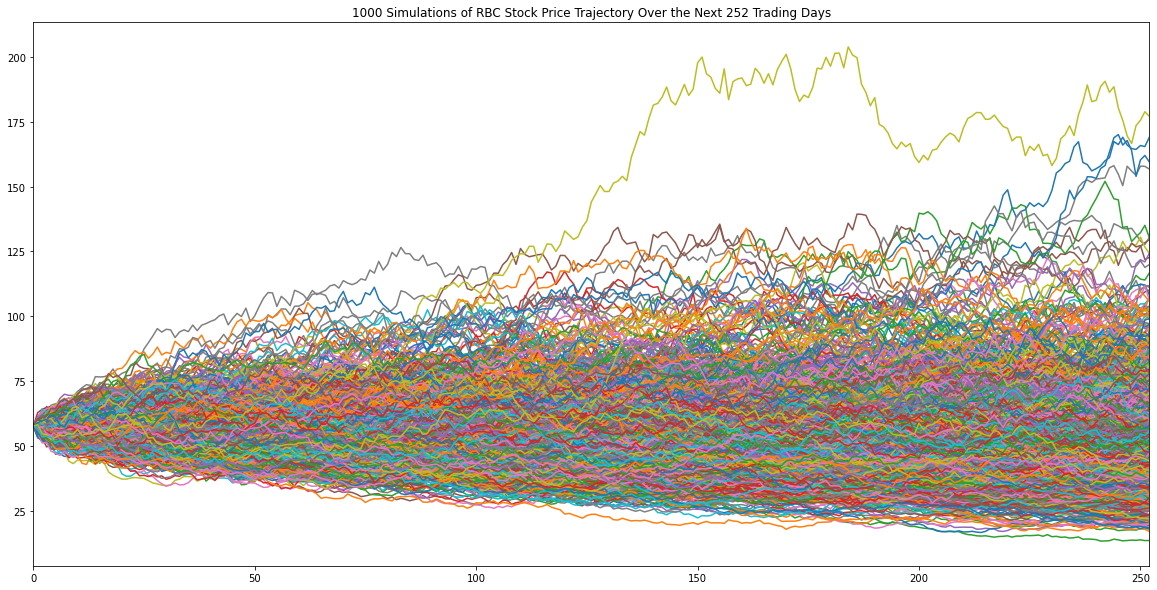

In [13]:
# Use the `plot` function to plot the trajectory of TSLA stock based on a 252 * 3 trading day simulation
plot_title = f"{n+1} Simulations of {ticker} Stock Price Trajectory Over the Next 252 Trading Days"
simulated_price_df.plot(legend=None, title=plot_title, figsize =[20,10])

In [14]:
# Select the last row for projecting stock prices (prices of each simulation on the last simulated trading day)
simulated_ending_prices = simulated_price_df.iloc[-1, :]
simulated_ending_prices.head()

Simulation 1    53.836202
Simulation 2    29.611753
Simulation 3    35.204395
Simulation 4    51.446563
Simulation 5    66.662851
Name: 252, dtype: float64

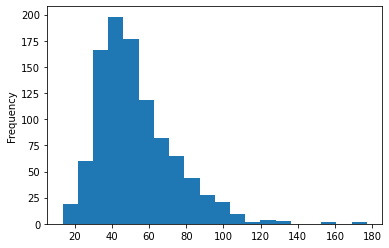

In [15]:
# Use the `plot` function to plot a frequency distribution of simulated ending prices
simulated_ending_prices.plot(kind='hist', bins=20)

In [16]:
# Use the `value_counts` function to create the frequency distribution and 
# sort the data into 20 bins. Divide the value counts of each bin by the total
# number of prices to return the probability of each range
simulated_ending_prices.value_counts(bins=20) / len(simulated_ending_prices)

(38.054, 46.231]      0.198
(46.231, 54.408]      0.177
(29.877, 38.054]      0.166
(54.408, 62.585]      0.118
(62.585, 70.762]      0.082
(70.762, 78.939]      0.065
(21.7, 29.877]        0.060
(78.939, 87.116]      0.044
(87.116, 95.293]      0.028
(95.293, 103.47]      0.021
(13.358, 21.7]        0.019
(103.47, 111.646]     0.009
(119.823, 128.0]      0.004
(128.0, 136.177]      0.003
(111.646, 119.823]    0.002
(152.531, 160.708]    0.002
(168.885, 177.062]    0.002
(160.708, 168.885]    0.000
(136.177, 144.354]    0.000
(144.354, 152.531]    0.000
Name: 252, dtype: float64

In [17]:
# Use the `quantile` function to calculate the 95% confidence interval for simulated ending prices
confidence_interval = simulated_ending_prices.quantile(q=[0.025, 0.975])
confidence_interval

0.025     23.249400
0.975    102.313899
Name: 252, dtype: float64

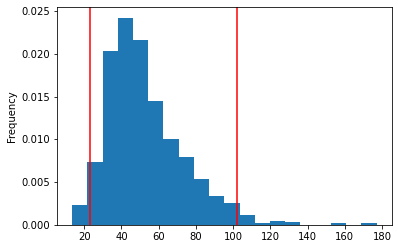

In [18]:
# Use the `plot` function to create a probability distribution histogram of simulated ending prices
# with markings for a 95% confidence interval
plt.figure();
simulated_ending_prices.plot(kind='hist', density=True, bins=20)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [19]:
# Set timeframe to "1D"
timeframe = "1D"

# Set the dates for the price of the desired stock for 20 July 2020
start_date = pd.Timestamp("2020-07-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-07-20", tz="America/New_York").isoformat()

# Get actual stock price for the desired stock on 20th July 2020
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

df

RBC                             
                           open   high    low  close  volume
time                                                        
2020-07-20 00:00:00-04:00  91.5  92.24  90.15  90.97  139408

## 4. Analysis of Banks Stock Prices & Associated Investment Porfolio Analysis
### 4.1 Preparation

In [1]:
! pip install finquant

In [20]:
from finquant.portfolio import build_portfolio
from finquant.efficient_frontier import EfficientFrontier
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.signal import find_peaks
import hvplot.pandas  
import hvplot.dask
from plotly.subplots import make_subplots

### 4.1 Small Banks Analysis

In this section, both the investment pofolio performance and the small bank stock price changes for different time period are described.

[*********************100%***********************]  4 of 4 completed
the weights for maximum sharpe ratio =         Allocation
LB.TO     0.294914
CWB.TO    0.358543
EQB.TO    0.278550
HCG.TO    0.067994
the weights for minimum volatility =         Allocation
LB.TO     0.556378
CWB.TO    0.224394
EQB.TO    0.206375
HCG.TO    0.012853


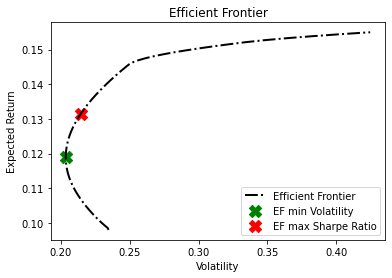

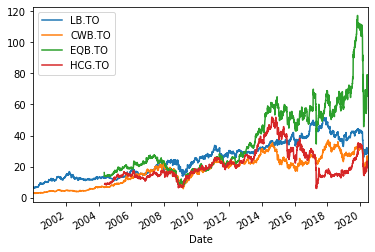

In [21]:
# Efficient Frontier for small banks for 2020-06-30
small_banks = ['LB.TO', 'CWB.TO', 'EQB.TO', 'HCG.TO']
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 6, 30)
small_banks_pf = build_portfolio(names=small_banks, start_date=start_date, end_date=end_date, data_api="yfinance")
print(f"the weights for maximum sharpe ratio = {small_banks_pf.ef_maximum_sharpe_ratio(verbose=False)}")
print(f"the weights for minimum volatility = {small_banks_pf.ef_minimum_volatility(verbose=False)}")

small_banks_pf.ef_plot_efrontier()
# adding markers to optimal solutions
small_banks_pf.ef_plot_optimal_portfolios()
# perform visualization on prices on small banks
small_banks_pf.data.plot()
plt.show()

[*********************100%***********************]  4 of 4 completed
the weights for maximum sharpe ratio =         Allocation
LB.TO     0.365194
CWB.TO    0.309717
EQB.TO    0.250638
HCG.TO    0.074450
the weights for minimum volatility =         Allocation
LB.TO     0.533667
CWB.TO    0.222728
EQB.TO    0.224608
HCG.TO    0.018997


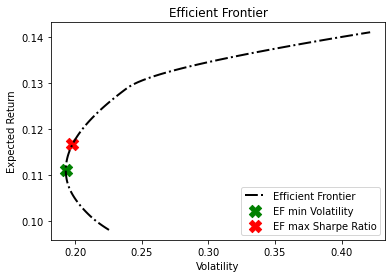

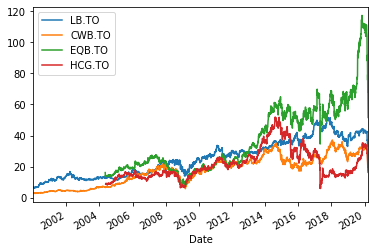

In [22]:
# Efficient Frontier for small banks for 2020-03-23
small_banks = ['LB.TO', 'CWB.TO', 'EQB.TO', 'HCG.TO']
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 3, 23)
small_banks_pf = build_portfolio(names=small_banks, start_date=start_date, end_date=end_date, data_api="yfinance")
print(f"the weights for maximum sharpe ratio = {small_banks_pf.ef_maximum_sharpe_ratio(verbose=False)}")
print(f"the weights for minimum volatility = {small_banks_pf.ef_minimum_volatility(verbose=False)}")
small_banks_pf.ef_plot_efrontier()
# adding markers to optimal solutions
small_banks_pf.ef_plot_optimal_portfolios()
# perform visualization on prices on small banks
small_banks_pf.data.plot()
plt.show()

[*********************100%***********************]  4 of 4 completed
the weights for maximum sharpe ratio =         Allocation
LB.TO     0.350895
CWB.TO    0.277732
EQB.TO    0.293266
HCG.TO    0.078107
the weights for minimum volatility =         Allocation
LB.TO     0.536214
CWB.TO    0.212456
EQB.TO    0.232109
HCG.TO    0.019221


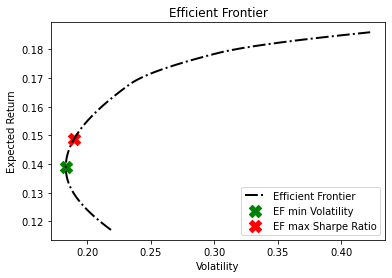

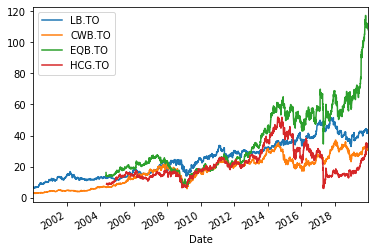

In [23]:
# Efficient Frontier for small banks for 2020-01-01
small_banks = ['LB.TO', 'CWB.TO', 'EQB.TO', 'HCG.TO']
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 1, 1)
small_banks_pf = build_portfolio(names=small_banks, start_date=start_date, end_date=end_date, data_api="yfinance")
print(f"the weights for maximum sharpe ratio = {small_banks_pf.ef_maximum_sharpe_ratio(verbose=False)}")
print(f"the weights for minimum volatility = {small_banks_pf.ef_minimum_volatility(verbose=False)}")
small_banks_pf.ef_plot_efrontier()
# adding markers to optimal solutions
small_banks_pf.ef_plot_optimal_portfolios()
# perform visualization on prices on small banks
small_banks_pf.data.plot()
plt.show()

[*********************100%***********************]  6 of 6 completed
the weights for maximum sharpe ratio =           Allocation
BNS.TO  3.564968e-17
TD.TO   3.156807e-17
BMO.TO  0.000000e+00
RY.TO   4.736693e-01
NA.TO   5.263307e-01
CM.TO   0.000000e+00
the weights for minimum volatility =         Allocation
BNS.TO    0.153002
TD.TO     0.187909
BMO.TO    0.166086
RY.TO     0.187520
NA.TO     0.281962
CM.TO     0.023521


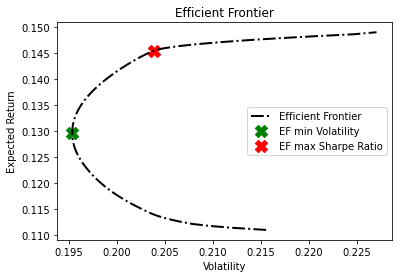

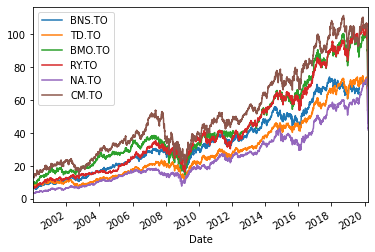

In [24]:
# Efficient Frontier for big banks for 2020-03-23
big_banks = ['BNS.TO', 'TD.TO', 'BMO.TO', 'RY.TO', 'NA.TO', 'CM.TO']
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 3, 23)
big_banks_pf = build_portfolio(names=big_banks, start_date=start_date, end_date=end_date, data_api="yfinance")
print(f"the weights for maximum sharpe ratio = {big_banks_pf.ef_maximum_sharpe_ratio(verbose=False)}")
print(f"the weights for minimum volatility = {big_banks_pf.ef_minimum_volatility(verbose=False)}")

big_banks_pf.ef_plot_efrontier()
# adding markers to optimal solutions
big_banks_pf.ef_plot_optimal_portfolios()
# perform visualization on prices on big banks
big_banks_pf.data.plot()
plt.show()

### 4.2 Big Banks Analysis

In this section, both the investment pofolio performance and the big bank stock price changes for different time period are described.

[*********************100%***********************]  6 of 6 completed
the weights for maximum sharpe ratio =           Allocation
BNS.TO  0.000000e+00
TD.TO   2.781908e-17
BMO.TO  1.046883e-17
RY.TO   4.261905e-01
NA.TO   5.738095e-01
CM.TO   0.000000e+00
the weights for minimum volatility =         Allocation
BNS.TO    0.160624
TD.TO     0.190896
BMO.TO    0.147857
RY.TO     0.221543
NA.TO     0.239888
CM.TO     0.039192


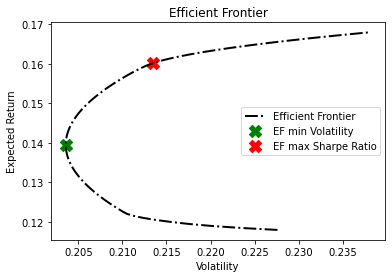

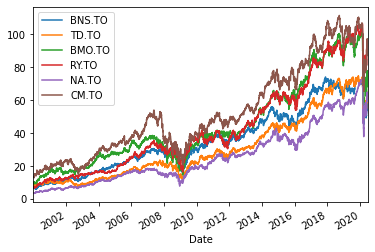

In [25]:
# Efficient Frontier for big banks for 2020-06-30
big_banks = ['BNS.TO', 'TD.TO', 'BMO.TO', 'RY.TO', 'NA.TO', 'CM.TO']
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 6, 30)
big_banks_pf = build_portfolio(names=big_banks, start_date=start_date, end_date=end_date, data_api="yfinance")
print(f"the weights for maximum sharpe ratio = {big_banks_pf.ef_maximum_sharpe_ratio(verbose=False)}")
print(f"the weights for minimum volatility = {big_banks_pf.ef_minimum_volatility(verbose=False)}")

big_banks_pf.ef_plot_efrontier()
# adding markers to optimal solutions
big_banks_pf.ef_plot_optimal_portfolios()
# perform visualization on prices on big banks
big_banks_pf.data.plot()
plt.show()

[*********************100%***********************]  6 of 6 completed
the weights for maximum sharpe ratio =           Allocation
BNS.TO  2.358986e-02
TD.TO   1.127570e-17
BMO.TO  4.038981e-02
RY.TO   3.410324e-01
NA.TO   5.949879e-01
CM.TO   5.610746e-18
the weights for minimum volatility =         Allocation
BNS.TO    0.151400
TD.TO     0.185197
BMO.TO    0.194447
RY.TO     0.144501
NA.TO     0.292637
CM.TO     0.031818


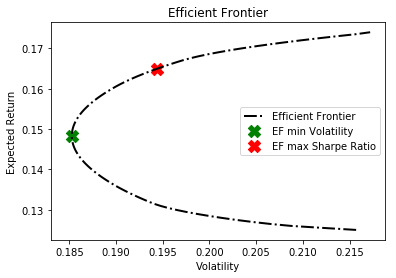

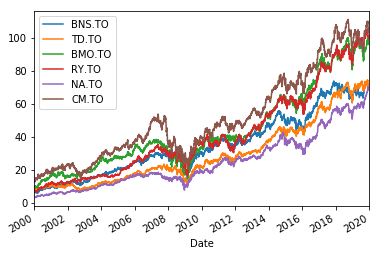

In [8]:
# Efficient Frontier for big banks for 2020-01-01
big_banks = ['BNS.TO', 'TD.TO', 'BMO.TO', 'RY.TO', 'NA.TO', 'CM.TO']
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime(2020, 1, 1)
big_banks_pf = build_portfolio(names=big_banks, start_date=start_date, end_date=end_date, data_api="yfinance")
print(f"the weights for maximum sharpe ratio = {big_banks_pf.ef_maximum_sharpe_ratio(verbose=False)}")
print(f"the weights for minimum volatility = {big_banks_pf.ef_minimum_volatility(verbose=False)}")

big_banks_pf.ef_plot_efrontier()
# adding markers to optimal solutions
big_banks_pf.ef_plot_optimal_portfolios()
# perform visualization on prices on big banks
big_banks_pf.data.plot()
plt.show()

### 4.3 Monte Carlo Simulation and Maximum Sharpe Ratio for Bank Groups

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.139
Volatility: 0.183
Sharpe Ratio: 0.730

Optimal weights:
               LB.TO    CWB.TO    EQB.TO    HCG.TO
Allocation  0.553738  0.184044  0.229006  0.033213
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 0.150
Volatility: 0.191
Sharpe Ratio: 0.758

Optimal weights:
               LB.TO    CWB.TO    EQB.TO    HCG.TO
Allocation  0.338246  0.271725  0.305194  0.084835
----------------------------------------------------------------------


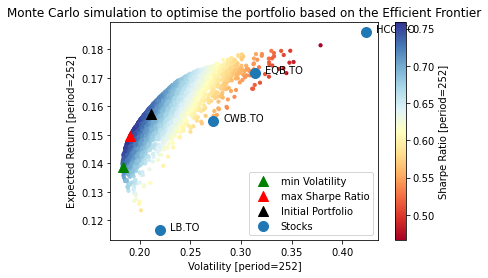

In [26]:
# Perform a Monte Carlo run to find the portfolio with the minimum volatility and maximum Sharpe Ratio
# for small banks
opt_w, opt_res = small_banks_pf.mc_optimisation(num_trials=5000)
small_banks_pf.mc_properties()
small_banks_pf.mc_plot_results()
# show the individual stocks
small_banks_pf.plot_stocks()
plt.show()

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.138
Volatility: 0.204
Sharpe Ratio: 0.654

Optimal weights:
              BNS.TO     TD.TO    BMO.TO     RY.TO     NA.TO     CM.TO
Allocation  0.174236  0.194675  0.149984  0.214646  0.212369  0.054089
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 0.155
Volatility: 0.210
Sharpe Ratio: 0.714

Optimal weights:
              BNS.TO    TD.TO   BMO.TO    RY.TO     NA.TO     CM.TO
Allocation  0.077144  0.01265  0.06683  0.28867  0.524207  0.030499
----------------------------------------------------------------------


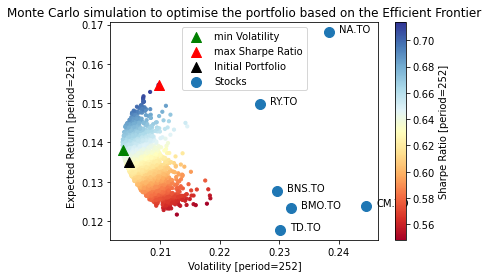

In [27]:
# Perform a Monte Carlo run to find the portfolio with the minimum volatility and maximum Sharpe Ratio
# for big banks
opt_w, opt_res = big_banks_pf.mc_optimisation(num_trials=5000)
big_banks_pf.mc_properties()
big_banks_pf.mc_plot_results()
# show the individual stocks
big_banks_pf.plot_stocks()
plt.show()

### 4.4 Stock Returns for Big and Small Bank Groups

The big bank groups are BNS, TD, BMO, Royal Bank of Canada, National Bank and Canadian Imperial Bank of Commerce.
The small bank groups include LB (Laurientian Bank),CWB(Canadian Western Bank), EQB(EQ Bank), HCG(Home Capital Group)

In [28]:
# Plot stock returns for big bank groups
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 6, 30)
big_banks_pf = build_portfolio(names=big_banks, start_date=start_date, end_date=end_date, data_api="yfinance")
big_banks_return=big_banks_pf.data.pct_change()
big_banks_return['average'] = big_banks_return.mean(numeric_only=True, axis=1)
big_banks_return= (1 + big_banks_return.fillna(0)).cumprod()
big_banks_return.hvplot(x='Date', y=['BNS.TO', 'TD.TO', 'BMO.TO','RY.TO','NA.TO','CM.TO'],
             value_label='Big Bank Stock Evolution through COVID',figsize=(600,1200))

[*********************100%***********************]  6 of 6 completed


:NdOverlay   [Variable]
   :Curve   [Date]   (Big Bank Stock Evolution through COVID)

In [29]:
# Plot stock returns for small bank groups
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 6, 30)
small_banks_pf = build_portfolio(names=small_banks, start_date=start_date, end_date=end_date, data_api="yfinance")
small_banks_return=small_banks_pf.data.pct_change()
small_banks_return['average'] = small_banks_return.mean(numeric_only=True, axis=1)
small_banks_return= (1 + small_banks_return.fillna(0)).cumprod()
small_banks_return.hvplot(x='Date', y=['LB.TO', 'CWB.TO', 'EQB.TO','HCG.TO'],
             value_label='Small Stock Evolution through COVID',figsize=(600,1200))


[*********************100%***********************]  4 of 4 completed


:NdOverlay   [Variable]
   :Curve   [Date]   (Small Stock Evolution through COVID)

In [30]:
# Plot small banks' stock price return along with that of big banks
consol_banks=pd.DataFrame(columns=['Big Banks','Small Banks'],index=big_banks_return.index)
consol_banks['Big Banks']=big_banks_return['average'].copy()
consol_banks['Small Banks']=small_banks_return['average'].copy()
plot_banks=consol_banks.hvplot(x='Date', y=['Big Banks','Small Banks'],
             value_label='COVID impact on small vs big banks',legend='top', grid=True,height=500, width=700)
plot_banks

:NdOverlay   [Variable]
   :Curve   [Date]   (COVID impact on small vs big banks)